# Project Background: Building a recommender model for courses by utilizing and evaluating different recommender systems 
The following techniques are implemented:
## Content-based Recommender System using Unsupervised Learning
 - Content-based recommender system using user profile and course genres
 - Content-based recommender system using course similarity
 - Content-based recommender system using user profile clustering
## Collaborative-filtering Recommender System using Supervised Learning
 - KNN-based collaborative filtering
 - NMF-based collaborative filtering
 - Neural network embedding based collaborative filtering
 - Collaborative filtering algorithms evaluation

In [1]:
#importing important libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Load the dataset 

In [173]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [174]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [175]:
#checking columns of both dataset
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [176]:
ratings_df.columns

Index(['user', 'item', 'rating'], dtype='object')

In [177]:
#we can find all machine learnig related course
df_ml = course_df[course_df['MachineLearning']==1]
df_ml

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,data ai essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,ybrid cloud conference ai pipelines lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,data ai jumpstart your journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,ai for everyone master the basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,excourse61,convolutional neural networks in tensorflow,0,0,0,0,0,1,1,0,0,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0
290,excourse77,natural language processing with attention models,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,excourse78,natural language processing with sequence models,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [178]:
#Finding all courses with genres MachineLearning == 1 and BigData == 1
df_ml_Bigdata = course_df[(course_df['MachineLearning']==1)&(course_df['BigData']==1)]
df_ml_Bigdata[["COURSE_ID","MachineLearning","BigData"]]

,COURSE_ID,MachineLearning,BigData
46,GPXX0BUBEN,1,1
59,TA0106EN,1,1
184,BD0221EN,1,1
282,excourse69,1,1


In [179]:
# selecting course genres
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.

In [180]:
sorted_values = course_df[genres].sum().sort_values(ascending=False)
sorted_values

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64

In [181]:
df_sorted = pd.DataFrame(sorted_values).reset_index()
df_sorted

,index,0
0,BackendDev,78
1,MachineLearning,69
2,Database,60
3,DataAnalysis,56
4,DataScience,38
5,CloudComputing,37
6,BigData,36
7,Python,28
8,FrontendDev,19
9,Containers,17


In [182]:
df_sorted.rename(columns={'index':'genres',0:'Count'},inplace=True)
df_sorted

,genres,Count
0,BackendDev,78
1,MachineLearning,69
2,Database,60
3,DataAnalysis,56
4,DataScience,38
5,CloudComputing,37
6,BigData,36
7,Python,28
8,FrontendDev,19
9,Containers,17


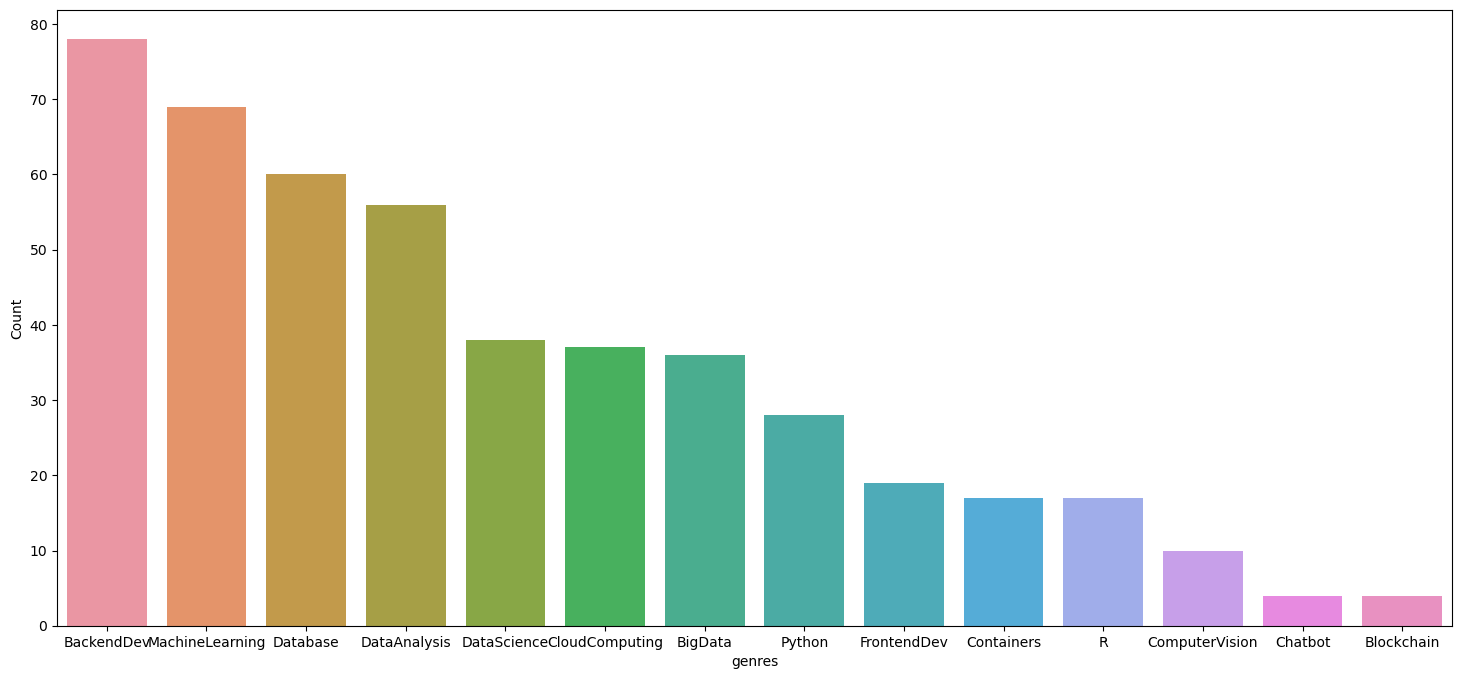

In [183]:
# generating a barchart on genres and count
fig = plt.figure(figsize=(18,8))
ax = sns.barplot(x="genres", y="Count",data=df_sorted)

In [184]:
# Looking course enrollment dataset
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.


In [185]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.

In [186]:
total_users = ratings_df.groupby(['user']).size()
total_users

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

After the aggregation, we should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.

In [187]:
total_users.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.

Text(0, 0.5, 'Count')

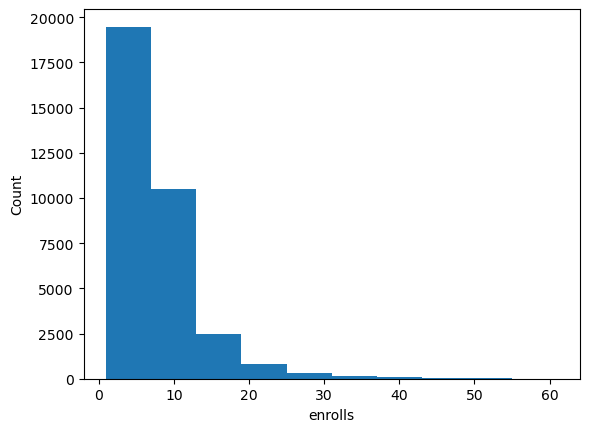

In [188]:
plt.hist(total_users)
plt.xlabel("enrolls")
plt.ylabel("Count")

# Top-20 Most Popular Courses
Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.
Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions

In [93]:
#collecting unique course ID and its title
courseID_Title = course_df[["COURSE_ID","TITLE"]]
courseID_Title.drop_duplicates(subset=['COURSE_ID'],inplace=True)
courseID_Title

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,COURSE_ID,TITLE
0,ML0201EN,robots are coming build iot apps with watson ...
1,ML0122EN,accelerating deep learning with gpu
2,GPXX0ZG0EN,consuming restful services using the reactive ...
3,RP0105EN,analyzing big data in r using apache spark
4,GPXX0Z2PEN,containerizing packaging and running a sprin...
...,...,...
302,excourse89,javascript jquery and json
303,excourse90,programming foundations with javascript html ...
304,excourse91,front end web development with react
305,excourse92,introduction to web development


In [190]:
#renaming item to COURSE_ID to match with course_df dataset
ratings_df.rename(columns={'item':'COURSE_ID'},inplace = True)
ratings_df

,user,COURSE_ID,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
...,...,...,...
233301,1540125,DS0101EN,3.0
233302,1250651,PY0101EN,3.0
233303,1003832,CB0105ENv1,3.0
233304,922065,BD0141EN,3.0


In [191]:
#Finding enrollments for each course
Enrollment = ratings_df.groupby(['COURSE_ID']).size()
sorted_Enrollment=Enrollment.sort_values(ascending =False)
sorted_Enrollment

COURSE_ID
PY0101EN      14936
DS0101EN      14477
BD0101EN      13291
BD0111EN      10599
DA0101EN       8303
              ...  
ST0201EN          1
ST0301EN          1
DX0106EN          1
DX0108EN          1
GPXX0QR3EN        1
Length: 126, dtype: int64

In [192]:
df_sorted_Enrollment=pd.DataFrame(sorted_Enrollment).reset_index()
df_sorted_Enrollment.rename(columns={0:'Enrolls'},inplace = True)
df_sorted_Enrollment

,COURSE_ID,Enrolls
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
...,...,...
121,ST0201EN,1
122,ST0301EN,1
123,DX0106EN,1
124,DX0108EN,1


In [193]:
df_title_enrolls = df_sorted_Enrollment.merge(courseID_Title, how="left", on= "COURSE_ID")
title_enrolls = df_title_enrolls[["TITLE","Enrolls"]]

In [194]:
title_enrolls.iloc[0:20,:]

,TITLE,Enrolls
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


# Plot a Word Cloud from Course Titles

In [195]:
!pip install wordcloud==1.8.1

In [196]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:

In [197]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [198]:
# Filtering English Stopwords and other less meaning words
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [199]:
#creating worlcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

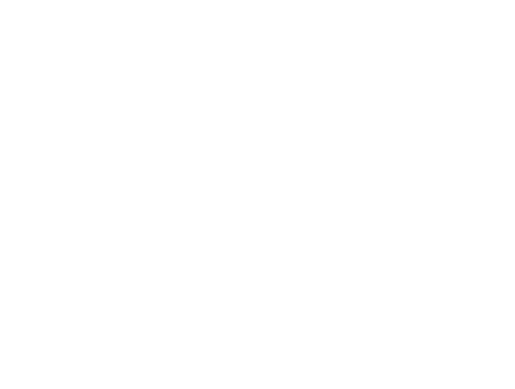

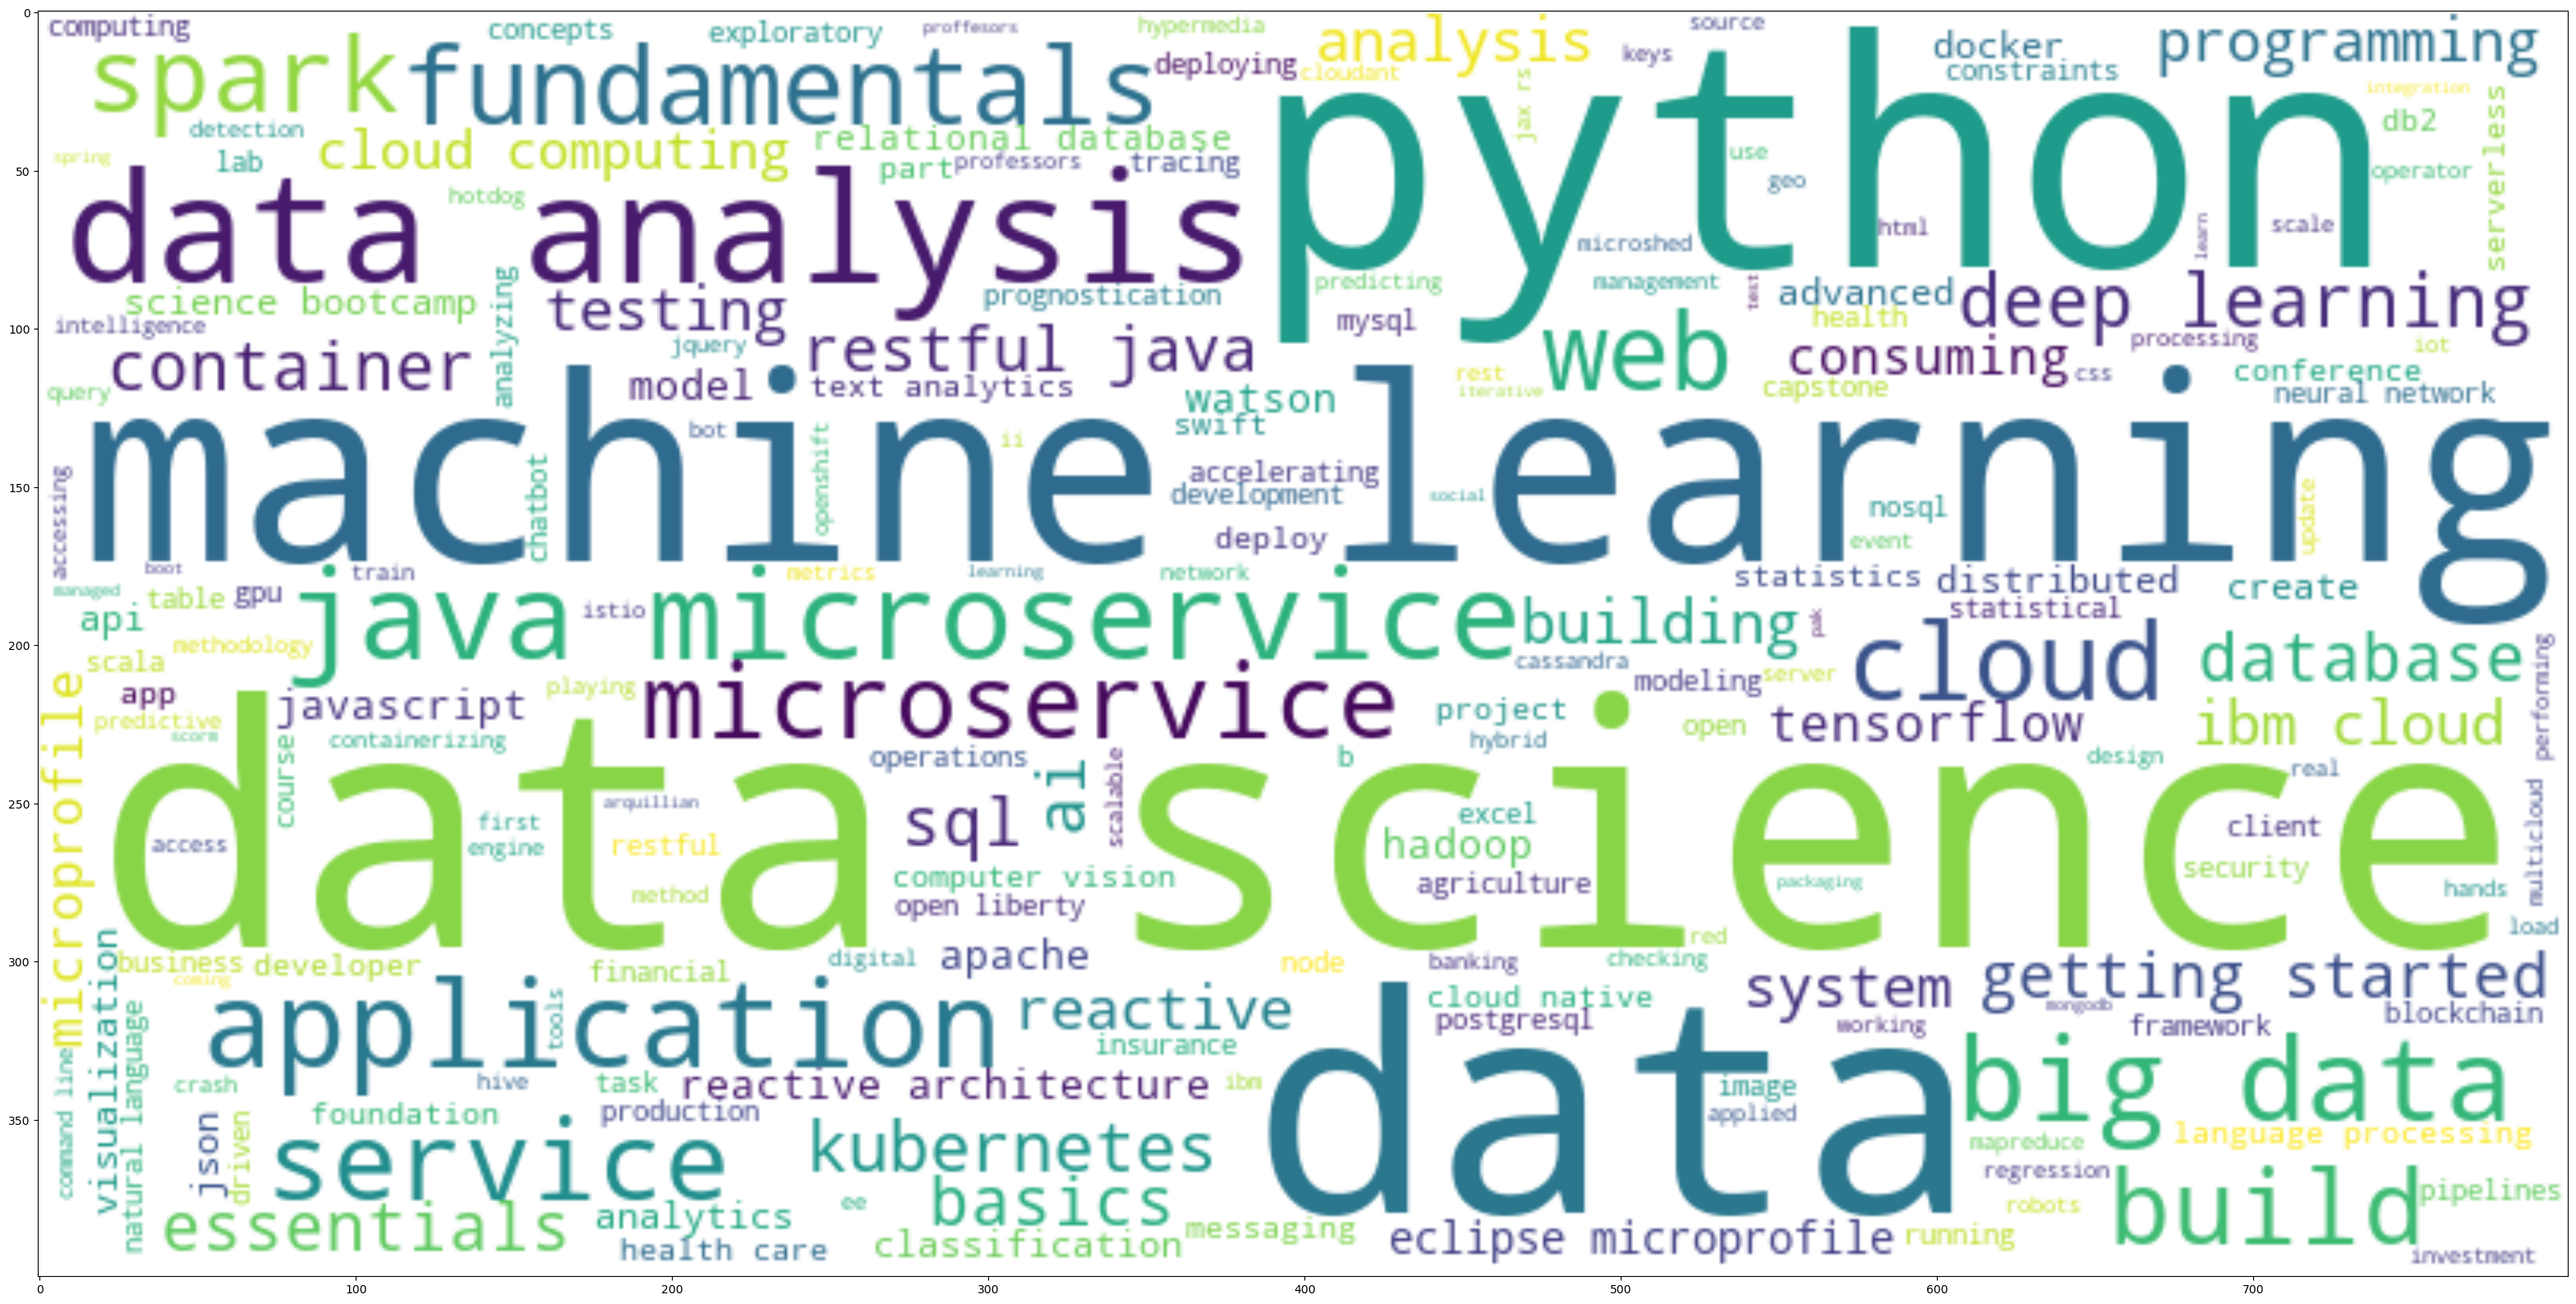

In [200]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Generating course recommendations based on user profile and course genre vectors

Loading a user's profile dataframe and a course genre dataframe:

In [44]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_genres_df = pd.read_csv(course_genre_url)

In [45]:
course_genres_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [46]:
profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
profile_df = pd.read_csv(profile_genre_url)

In [47]:
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [48]:
#The profile dataframe contains the course interests for each user, for example, user 8 is very interested in R, data analysis, database, and big data:
profile_df[profile_df['user'] == 8]

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [49]:
#Loading test dataset containing test users to whom we want to make course recommedations 
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_users_url)

In [50]:
test_users_df.head()

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0


In [51]:
#Let's see how many test users are in dataset
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


Then for each test user in the test dataset, you need to first find out which courses are unknown/unselected to them. For example, suppose we have a user `1078030` with profile:

In [52]:
test_user_profile = profile_df[profile_df['user'] == 1078030]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
18204,1078030,0.0,12.0,0.0,9.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [54]:
#Finding enrolled courses 
enrolled_courses = test_users_df[test_users_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

In [55]:
all_courses = set(course_genres_df['COURSE_ID'].values)

In [56]:
#Then we can use all courses to subtract the enrolled courses to get a set of all unknown courses for user 1078030, and we want to find potential interested courses hidden in the unknown course list.
unknown_courses = all_courses.difference(enrolled_courses)

In [57]:
#creating genre vector
unknown_course_genres = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [58]:
score = np.dot(course_matrix[1], test_user_vector)
score

30.0

Calculating recommendation score for all courses for all 1000 test users.

In [59]:
# We first reload all datasets again, and create an empty dictionary to store the results
test_users_df = pd.read_csv(test_users_url)
profile_df = pd.read_csv(profile_genre_url)
course_genres_df = pd.read_csv(course_genre_url)
res_dict = {}

In [60]:
#filtering out the courses with low score
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0

In [61]:
def generate_recommendation_scores():
    users = []
    courses = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = profile_df[profile_df['user'] == user_id]
        # get user vector for the current user id
        #test_user_vector = test_user_profile.iloc[user_id, 1:].values
        test_user_vector = test_user_profile.iloc[0, 1:].values
        
        # get the unknown course ids for the current user id
        enrolled_courses = test_users_df[test_users_df['user'] == user_id]['item'].to_list()
        unknown_courses = all_courses.difference(enrolled_courses)
        unknown_course_df = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values
        course_matrix = unknown_course_df.iloc[:, 2:].values
        
        # user np.dot() to get the recommendation scores for each course
        recommendation_scores = np.dot(course_matrix, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]
            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])
                
    return users, courses, scores

In [62]:
# Return users, courses, and scores lists for the dataframe
users, courses, scores = generate_recommendation_scores()
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
res_df
# Save the dataframe 
#res_df.to_csv("profile_rs_results.csv", index=False)

,USER,COURSE_ID,SCORE
0,37465,RP0105EN,27.0
1,37465,GPXX06RFEN,12.0
2,37465,CC0271EN,15.0
3,37465,BD0145EN,24.0
4,37465,DE0205EN,15.0
...,...,...,...
53406,2087663,excourse88,15.0
53407,2087663,excourse89,15.0
53408,2087663,excourse90,15.0
53409,2087663,excourse92,15.0


In [63]:
#On average, how many new courses have been recommended per test user?
recom_total = res_df.groupby(['USER']).size()
recom_total

USER
37465       67
85625      131
108541      67
109915       2
149690      72
          ... 
2056952     68
2061096     77
2074313     66
2074462      3
2087663    204
Length: 864, dtype: int64

In [64]:
recom_total.describe()

count    864.000000
mean      61.818287
std       46.592144
min        1.000000
25%       30.000000
50%       51.500000
75%       81.250000
max      267.000000
dtype: float64

In [65]:
#finding top score of the courses
Top_score = res_df.groupby(['SCORE','COURSE_ID']).max()
Top_score

USER
SCORE COURSE_ID         
10.0  BD0111EN    418401
      BD0115EN    418401
      BD0121EN    435051
      BD0131EN    435051
      BD0133EN    246703
...                  ...
90.0  SC0103EN    733707
      TMP0105EN   733707
      excourse72  733707
      excourse73  733707
99.0  RP0105EN    733707

[3584 rows x 1 columns]

In [66]:
sorted_score = Top_score.sort_values(by="SCORE", ascending = False)
sorted_score

USER
SCORE COURSE_ID         
99.0  RP0105EN    733707
90.0  excourse73  733707
      excourse72  733707
      TMP0105EN   733707
      SC0103EN    733707
...                  ...
10.0  excourse71  435051
      excourse74  246703
      excourse75  246703
      excourse76  246703
      BD0111EN    418401

[3584 rows x 1 columns]

In [67]:
sorted_score = sorted_score.reset_index()

In [68]:
sorted_score

,SCORE,COURSE_ID,USER
0,99.0,RP0105EN,733707
1,90.0,excourse73,733707
2,90.0,excourse72,733707
3,90.0,TMP0105EN,733707
4,90.0,SC0103EN,733707
...,...,...,...
3579,10.0,excourse71,435051
3580,10.0,excourse74,246703
3581,10.0,excourse75,246703
3582,10.0,excourse76,246703


In [69]:
#Selecting top 10 courses
top10_rec = sorted_score.COURSE_ID.iloc[0:10]

In [70]:
top10_rec = pd.DataFrame(top10_rec)
top10_rec

,COURSE_ID
0,RP0105EN
1,excourse73
2,excourse72
3,TMP0105EN
4,SC0103EN
5,RP0105EN
6,excourse73
7,excourse72
8,TMP0105EN
9,TMP0105EN


In [71]:
courseID_Title = course_df[["COURSE_ID","TITLE"]]
courseID_Title.drop_duplicates(subset=['COURSE_ID'],inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [72]:
top10_rec_title = top10_rec.merge(courseID_Title, how="left", on= "COURSE_ID")
top10_rec_title[["COURSE_ID","TITLE"]]

,COURSE_ID,TITLE
0,RP0105EN,analyzing big data in r using apache spark
1,excourse73,analyzing big data with sql
2,excourse72,foundations for big data analysis with sql
3,TMP0105EN,getting started with the data apache spark ma...
4,SC0103EN,spark overview for scala analytics
5,RP0105EN,analyzing big data in r using apache spark
6,excourse73,analyzing big data with sql
7,excourse72,foundations for big data analysis with sql
8,TMP0105EN,getting started with the data apache spark ma...
9,TMP0105EN,getting started with the data apache spark ma...


# Generate course recommendations based on course similarities for all test uesrs

In [73]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_users_url)

In [74]:
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [75]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)
course_df

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
...,...,...,...
302,excourse89,javascript jquery and json,in this course we ll look at the javascript l...
303,excourse90,programming foundations with javascript html ...,learn foundational programming concepts e g ...
304,excourse91,front end web development with react,this course explores javascript based front en...
305,excourse92,introduction to web development,this course is designed to start you on a path...


In [76]:
# Create course id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [77]:
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bow_df = pd.read_csv(bow_url)
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)

In [78]:
bow_df

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1
...,...,...,...,...
10361,306,excourse93,modifying,1
10362,306,excourse93,objectives,1
10363,306,excourse93,pieces,1
10364,306,excourse93,plugins,1


In [79]:
def generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6 
    for enrolled_course in enrolled_course_ids:
        for unselect_course in unselected_course_ids:
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:
                
                sim = 0
                # Find the two indices for each enrolled_course and unselect_course, based on their two ids
                # Calculate the similarity between an enrolled_course and an unselect_course
                # e.g., Course ML0151EN's index is 200 and Course ML0101ENv3's index is 158
                
                # Find the similarity value from the sim_matrix
                # sim = sim_matrix[200][158]
               
                idx1 = id_idx_dict[enrolled_course]
                idx2 = id_idx_dict[unselect_course]
                              
                sim = sim_matrix[idx1][idx2]
                
                if sim > threshold:
                    if unselect_course not in res:
                        res[unselect_course] = sim
                    else:
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [80]:
sim_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/sim.csv"
sim_df = pd.read_csv(sim_url)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.033944,0.028239,0.018270,0.094759,0.060474,0.064851,0.053856,0.039467,0.036539,0.060474,...,0.047186,0.116008,0.137406,0.211743,0.256220,1.000000,0.211520,0.168595,0.129766,0.263734
303,0.076825,0.063911,0.082698,0.030638,0.030415,0.000000,0.000000,0.119098,0.055132,0.045622,...,0.177989,0.092381,0.145126,0.527636,0.249675,0.211520,1.000000,0.242269,0.416067,0.178384
304,0.072898,0.138270,0.133400,0.017443,0.129871,0.009285,0.000000,0.254274,0.094165,0.025974,...,0.153128,0.105191,0.138692,0.281108,0.132977,0.168595,0.242269,1.000000,0.220159,0.128902
305,0.039276,0.031367,0.012684,0.018796,0.000000,0.015008,0.024926,0.082199,0.076102,0.055978,...,0.149234,0.093962,0.162170,0.476644,0.222350,0.129766,0.416067,0.220159,1.000000,0.126274


In [81]:
sim_matrix = sim_df.to_numpy()
sim_score_threshold = 0.65

In [82]:
def generate_recommendations_for_all():
    users = []
    courses = []
    sim_scores = []
    sim = 0
      
    for user_id in test_user_ids:
       
        # For each user, call generate_recommendations_for_one_user() to generate the recommendation results
        
        enrolled_course_ids = test_users_df[test_users_df['user'] == user_id]['item'].to_list()
        enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
        all_courses = set(course_df['COURSE_ID'])
        unselected_course_ids = all_courses.difference(enrolled_course_ids)
        res = generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix)
        
        # Append the results into the users, courses, and scores list
        for key,value in res.items():
            sim = value
            if sim >= sim_score_threshold:
                users.append(user_id)
                courses.append(key)
                sim_scores.append(value)

    return users, courses, sim_scores

In [83]:
res_dict = {}
users, courses, sim_scores = generate_recommendations_for_all()
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = sim_scores
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

In [84]:
res_df.head()

,USER,COURSE_ID,SCORE
0,37465,DS0110EN,0.732941
1,37465,excourse67,0.708214
2,37465,excourse63,0.694563
3,37465,excourse72,0.652535
4,37465,excourse74,0.650071


In [85]:
res_df.shape

(6729, 3)

In [86]:
recom_total = res_df.groupby(['USER']).size()
recom_total

USER
37465       5
50348       7
52091      11
70434       3
85625       3
           ..
2061096     5
2074313    11
2074462     1
2082818     3
2087663    12
Length: 974, dtype: int64

In [87]:
recom_total.mean()

6.908624229979466

In [88]:
recom_total.describe()

count    974.000000
mean       6.908624
std        4.063078
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       20.000000
dtype: float64

In [89]:
#finding top score of the courses
Top_score = res_df.groupby(['SCORE','COURSE_ID']).max()
Top_score

USER
SCORE    COURSE_ID          
0.650071 excourse74  2087663
0.652535 excourse72  2087663
0.652864 excourse68  1904245
0.655671 LB0101ENv1  1888188
         LB0105ENv1  1831769
0.657916 excourse23  1806207
         excourse36  1806207
0.659829 TA0105      2032910
         TA0105EN     927126
0.662622 ML0101ENv3  2087663
         ML0151EN    2057052
0.664509 excourse33  2074313
0.666667 TMP0106     1904245
0.666831 CO0301EN    1766896
         CO0401EN    1964245
0.668994 DAI101EN    2057052
         DS0132EN    1813726
0.672421 excourse65  1904245
0.680065 excourse47  2087663
0.681574 ML0122EN    2087663
         ML0122ENv3   591984
0.681638 excourse38  2074313
0.683130 HCC104EN    1866295
         HCC105EN    1454545
0.689253 excourse46  2087663
0.694563 excourse63  2087663
0.703648 excourse72  1813704
0.706845 excourse32  1806207
0.707107 ML0115EN    2082818
         ML0122ENv3  2032910
0.708214 excourse67  2087663
0.715436 excourse63  1904245
0.722018 excourse32  2074313
0.723536 DV0101EN    2056704
         DV0151EN    2082818
0.732791 CC0103EN    1332683
         CL0101EN    2087663
0.732941 DS0101EN    1904245
         DS0110EN    2087663
0.739704 excourse23  2074313
         excourse36  2074313
0.752631 excourse24  2087663
0.889499 TMP0101EN    927126
0.923381 CB0101EN    1871627
         CB0103EN    2087663
0.982873 ML0120EN    1522374
         ML0120ENv2  1522374
         ML0120ENv3  1522374
         ML0122ENv1  2036996
1.000000 ML0120EN    2036996
         ML0120ENv2  2036996
         ML0120ENv3  1916547

In [90]:
sorted_score = Top_score.sort_values(by="SCORE", ascending = False).reset_index()
sorted_score

,SCORE,COURSE_ID,USER
0,1.000000,ML0120ENv3,1916547
1,1.000000,ML0120ENv2,2036996
2,1.000000,ML0120EN,2036996
3,0.982873,ML0122ENv1,2036996
4,0.982873,ML0120ENv3,1522374
5,0.982873,ML0120ENv2,1522374
6,0.982873,ML0120EN,1522374
7,0.923381,CB0103EN,2087663
8,0.923381,CB0101EN,1871627
9,0.889499,TMP0101EN,927126


In [91]:
#Seleted top 10 courses
top_10_sim = sorted_score.COURSE_ID.iloc[0:10]
top_10_sim

0    ML0120ENv3
1    ML0120ENv2
2      ML0120EN
3    ML0122ENv1
4    ML0120ENv3
5    ML0120ENv2
6      ML0120EN
7      CB0103EN
8      CB0101EN
9     TMP0101EN
Name: COURSE_ID, dtype: object

In [92]:
top10_rec_title = top10_rec.merge(courseID_Title, how="left", on= "COURSE_ID")
top10_rec_title[["COURSE_ID","TITLE"]]

,COURSE_ID,TITLE
0,RP0105EN,analyzing big data in r using apache spark
1,excourse73,analyzing big data with sql
2,excourse72,foundations for big data analysis with sql
3,TMP0105EN,getting started with the data apache spark ma...
4,SC0103EN,spark overview for scala analytics
5,RP0105EN,analyzing big data in r using apache spark
6,excourse73,analyzing big data with sql
7,excourse72,foundations for big data analysis with sql
8,TMP0105EN,getting started with the data apache spark ma...
9,TMP0105EN,getting started with the data apache spark ma...
